## LDA is a probabilistic model to find cluster assignments for documents

### Uses 2 probability values to cluster documents:
### P(Word| topic) and P(topics| documents)

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer
print('Done')
!pip install xlrd

Done


In [4]:
headlines_df = pd.read_excel('ISG Evidence Package Report R4 12 5-1-19.xlsx')
print('Done')

Done


In [5]:
headlines_df.shape

(46423, 27)

In [6]:
NUM_SAMPLES = 10000

In [7]:
headlines_df = headlines_df.sample(NUM_SAMPLES, replace=False).reset_index(drop=True)

In [8]:
headlines_df.head(5)

,Case Number,PIN,Call Status,Priority,NCCA Number - ALL,Last Analyst,Optional 1,Problem,Product Model,Functional Area,...,Date Created,Account Number,Name,Parent Dealer Account and Name,Well Prepared?,Reason,Classification,CC,CSC,Case Text
0,DTAC-236777,PCGUPSA608116,Resolved-Dealer Closed,3-Report Only,12412437,Jeff D Solbrack,NaN,Non-specific System John Deere Message,AMS 4600/Generation 4/Display,Display Hardware,...,2018-08-27 11:42:40,078139,"Pape Machinery, Inc.","078139Pape Machinery, Inc.",Yes,NaN,NaN,Customer/Dealer,Feature/Enhancement Request,Hello Jeff This case was tagged with a solutio...
1,DTAC-318650,xxxxxxxxxxxxxx,Resolved-Dealer Closed,2-Normal,NaN,Kyle D Bradley,NaN,MyJohnDeere - dealer was not able to finish ac...,AMS MyJohnDeere/Website-Dashboard/Information ...,Website UserMgmt,...,2018-10-22 13:33:34,045194,"Western Equipment, L.L.C.","045194Western Equipment, L.L.C.",Yes,NaN,NaN,Customer/Dealer,Expectation/Performance,"Cancelled merge, advised to check that email a..."
2,DTAC-435177,xxxxxxxxxxxxx,Resolved-Completed,2-Normal,NaN,JASON LEAR,NaN,Team Manager-customer account setup with deale...,Operations Center/Construction and Forestry - ...,Website Org Mgmt,...,2019-01-28 14:39:27,178821,"Erb Equipment Co., Inc.","178821Erb Equipment Co., Inc.",NaN,Not Applicable,NaN,Customer/Dealer,Expectation/Performance,Product Model: Operations Center/Construction ...
3,16337601,NaN,Closed,3-Normal,NaN,"Sensouk, Chan",NaN,MyJD account validation,AMS MyJohnDeere/Website-Dashboard/Information ...,Website UserMgmt,...,2018-05-03 12:03:00,900000,Unit 90 Test Dealership,900000 - Unit 90 Test Dealership,F,NaN,NaN,NaN,NaN,"Sensouk, Chan, 03 May 2018 12:04 GMT Dealer Na..."
4,DTAC-551762,RWGSIPA504942,Resolved-Dealer Closed,2-Normal,NaN,RUSS WORSLEY,NaN,Replacement Activation Request,AMS StellarSupport/Website-Dashboard/Informati...,Website Application,...,2019-04-22 11:51:38,013966,SunSouth LLC,013966SunSouth LLC,NaN,Not Applicable,NaN,Activations,Activate,RWGSIPA5049424600 CommandCenterBasicsCommandCe...


In [9]:
X = headlines_df[r'Case Text']
X.head(10)

0    Hello Jeff This case was tagged with a solutio...
1    Cancelled merge, advised to check that email a...
2    Product Model: Operations Center/Construction ...
3    Sensouk, Chan, 03 May 2018 12:04 GMT Dealer Na...
4    RWGSIPA5049424600 CommandCenterBasicsCommandCe...
5    Product Model: JDLink Dashboard/Agriculture - ...
6    Product Model: AMS 4600/Generation 4/DisplayFu...
7    Product Model: AMS Apex/Desktop Software/Infor...
8    This case was unable to be resolved, and has b...
9    Dealer Name: KEITH RATHJEDealer Acct No: 06093...
Name: Case Text, dtype: object

In [10]:
count_vectorizer = CountVectorizer(ngram_range=(2,2))
#transformed_vector = count_vectorizer.fit_transform(X)
transformed_vector = count_vectorizer.fit_transform(headlines_df['Case Text'].values.astype('U'))

In [11]:
transformed_vector.shape

(10000, 357540)

In [12]:
feature_names = count_vectorizer.get_feature_names()
feature_names[200:205]

['001 2854', '001 517233', '001 522394', '001 522976', '001 523436']

In [13]:
NUM_TOPICS = 20
lda_model = LatentDirichletAllocation(n_components=NUM_TOPICS, max_iter=20)
lda= lda_model.fit_transform(transformed_vector)   
print('Done')

Done


In [14]:
lda.shape


(10000, 20)

In [15]:
lda[:2]

array([[1.84501846e-04, 5.21559665e-03, 1.84501850e-04, 6.48519979e-01,
        1.84501845e-04, 1.84501847e-04, 1.84501846e-04, 1.84501845e-04,
        1.84501847e-04, 1.84501845e-04, 1.84501846e-04, 1.84501845e-04,
        1.84501845e-04, 1.84501846e-04, 1.84501847e-04, 1.84501846e-04,
        1.84501846e-04, 1.84501848e-04, 3.43127893e-01, 1.84501847e-04],
       [2.13675215e-04, 2.13675216e-04, 2.13675215e-04, 1.69203491e-01,
        3.54181899e-01, 2.13675215e-04, 2.13675222e-04, 2.13675215e-04,
        2.13675217e-04, 2.13675214e-04, 2.13675214e-04, 2.13675216e-04,
        2.13675218e-04, 2.13675215e-04, 2.13675218e-04, 4.72982132e-01,
        2.13675216e-04, 2.13675218e-04, 2.13675220e-04, 2.13675216e-04]])

In [16]:
sum(lda[0])

0.9999999999999999

In [18]:
def print_topic (identifier,top_words=10):
    for topic_id,topic_word_probs in enumerate(lda_model.components_): #how often a word oppears with topic
        if topic_id == identifier:
            print ("Topic %d:" % (topic_id))
            top_feature_names = [feature_names[i] for i in topic_word_probs.argsort()[: -top_words -1 :-1]]
            print (" ".join(top_feature_names))

In [19]:
for i in range (14):
    print_topic(i, top_words = 3)


Topic 0:
on the the machine to the
Topic 1:
on the in the to the
Topic 2:
at the pmjoel kaczynski the implement
Topic 3:
john deere the issue has been
Topic 4:
on the for the in the
Topic 5:
on the called in activation code
Topic 6:
stellar support the radar harvest lab
Topic 7:
product model act sub area act
Topic 8:
org name org number customer org
Topic 9:
acct no dealer xid support center
Topic 10:
to the on the base station
Topic 11:
thank you you for for contacting
Topic 12:
on the in the of the
Topic 13:
site code apex activation code apex


In [20]:
topics=[]
for i in range(NUM_SAMPLES):
    topics.append(lda[i].argmax()
                 )
headlines_df['topic'] = topics
headlines_df.head

<bound method NDFrame.head of       Case Number                PIN             Call Status       Priority  \
0     DTAC-234671    xxxxxxxxxxxxxxx      Resolved-Completed       2-Normal   
1        16368942      PCAPEXG145965                  Closed       3-Normal   
2        16369214      PCGT3TA552818                  Closed       3-Normal   
3     DTAC-163798  1N04045RLE0006285  Resolved-System Closed       2-Normal   
4     DTAC-203991    xxxxxxxxxxxxxxx       Resolved-DAClosed       2-Normal   
...           ...                ...                     ...            ...   
9995  DTAC-311063     re573045571636  Resolved-System Closed       2-Normal   
9996  DTAC-285114      PCGUPSA655147      Resolved-Completed       2-Normal   
9997  DTAC-311798      PCS161B872179  Resolved-System Closed  3-Report Only   
9998  DTAC-272454      PCGU26H205021  Resolved-System Closed       2-Normal   
9999  DTAC-151600  xxxxxxxxxxxxxxxxx      Resolved-Completed       2-Normal   

     NCCA Number - AL

## Manifold _ used for non linear data

In [21]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components = 2, init='pca', random_state = 0)

In [22]:
lda_2d_tsne= tsne.fit_transform(lda)
print('done')

done


In [23]:
lda_df_tsne = pd.DataFrame(lda_2d_tsne)
lda_df_tsne.shape

(10000, 2)

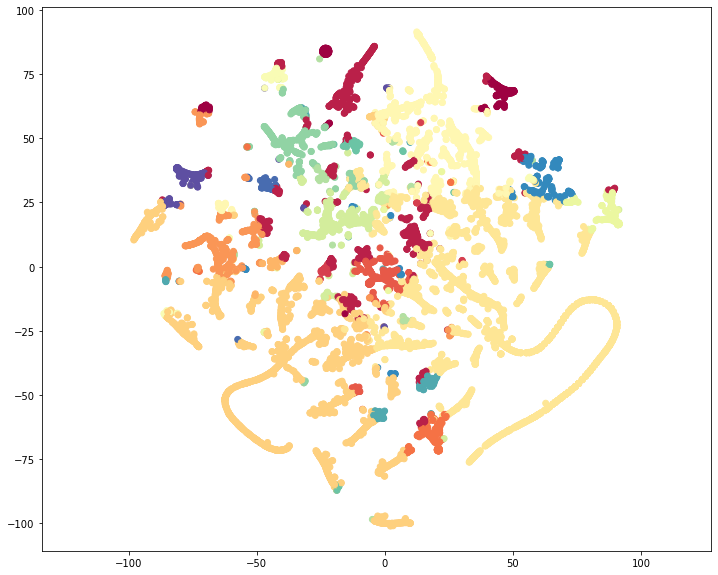

In [24]:
plt.subplots(figsize = (12,10))
plt.axis('equal');
plt.scatter(lda_df_tsne[0], lda_df_tsne[1], c=headlines_df['topic'],cmap=plt.cm.Spectral)

## PYLDAVIS

In [23]:
#dbpedia_df = pd.read_excel('ISG Evidence Package Report R4 12 5-1-19.xlsx', columns=['Case Number', 'Product Model', 'Case Text'])
dbpedia_df = pd.read_excel('ISG Evidence Package Report R4 12 5-1-19.xlsx',usecols=[0,8,26])
print('Done')

Done


In [24]:
dbpedia_df.size


139269

In [25]:
dbpedia_df.head(5)

,Case Number,Product Model,Case Text
0,16451489,AMS APEX/Desktop Software/Information Management,"White, Derek, 26 Apr 2019 07:30 GMT Dealer Nam..."
1,16451481,AMS ActImpGuidance/Active Implement Guidance/G...,"White, Derek, 24 Apr 2019 10:08 GMT Dealer Nam..."
2,16451455,AMS APEX/Desktop Software/Information Management,"White, Derek, 11 Apr 2019 08:42 GMT Dealer Nam..."
3,16451405,Operations Center/Agriculture - Website/Inform...,"###### Hanner, Joe, 29 Mar 2019 00:54 GMT DTAC..."
4,16451400,GSC Web Form/Information Management,"FORMUSER, 28 March 2019 16:23 GMT Op Center su..."


In [26]:
sorted(dbpedia_df['Product Model'].unique().astype(str))

['(DNU) ApplicationPro/Spreader, Seeder Pro (ISO)/Field and Crop Solutions',
 '(DNU) Gen 4 CommandCenter/Generation 4/Display',
 '(DNU) StarFire Mobile RTK/Field Documentation/Ag Management Solutions',
 '(DNU) StarFire Mobile RTK/Harvest Doc/Ag Management Solutions',
 '(DNU) StarFire Mobile RTK/StarFire Mobile RTK/GPS Receiver',
 '(DNU) StarFire Mobile RTK/TCM - Terrain Compensation Module/Ag Management Solutions',
 '(DNU) StarFire RTK/RTK/GPS Receiver',
 '(DNU) WDT/AMS WDT/Information Management',
 '1720/Planters/Planting and Seeding',
 '1775NT 16ROW/ExactEmerge w/ PMC/Planting and Seeding',
 '1775NT 24ROW/ExactEmerge 1A0 (775101-XXXXXX)/Planting and Seeding',
 '1795/MaxEmerge 5e 1A0 (775101-XXXXXX)/Planting and Seeding',
 '180GLC/1FF180GX__E020001 (iT4/S3B)/Excavator',
 '1910/Ground Drive PIN Prefix A0 and 1A8/Planting and Seeding',
 '1910/Hydraulic Drive PIN Prefix A0 and 1A8/Planting and Seeding',
 '2020A GPS/ProGator Gas/Golf and Turf Products',
 '20Support/Ag Management Solutions

In [27]:
X=dbpedia_df['Case Text']
X.head()

0    White, Derek, 26 Apr 2019 07:30 GMT Dealer Nam...
1    White, Derek, 24 Apr 2019 10:08 GMT Dealer Nam...
2    White, Derek, 11 Apr 2019 08:42 GMT Dealer Nam...
3    ###### Hanner, Joe, 29 Mar 2019 00:54 GMT DTAC...
4    FORMUSER, 28 March 2019 16:23 GMT Op Center su...
Name: Case Text, dtype: object

In [30]:
count_vectorizer = CountVectorizer(max_df=200, min_df=3) #if seen more then 200 or less than 3 the word is ignored.
#transformed_vector = count_vectorizer.fit_transform(X)
transformed_vector = count_vectorizer.fit_transform(dbpedia_df['Case Text'].values.astype('U'))

In [31]:
transformed_vector.shape

(46423, 30107)

In [32]:
feature_names = count_vectorizer.get_feature_names()

In [33]:
len(feature_names)

30107

In [34]:
feature_names [500:510]

['041909dealer',
 '041929customer',
 '041929dealer',
 '041944customer',
 '041958',
 '041958customer',
 '041958dealer',
 '042018',
 '042019',
 '042215']

In [35]:
NUM_TOPICS = 20 # arbitraty number of topics, I chose 20
lda_model = LatentDirichletAllocation(n_components = NUM_TOPICS, max_iter =100)
lda = lda_model.fit_transform(transformed_vector)

In [36]:
lda.shape

(46423, 20)

### Probability score for each topic

In [37]:
lda[:2]

array([[0.5125    , 0.0125    , 0.0125    , 0.0125    , 0.0125    ,
        0.0125    , 0.0125    , 0.0125    , 0.0125    , 0.0125    ,
        0.0125    , 0.0125    , 0.2625    , 0.0125    , 0.0125    ,
        0.0125    , 0.0125    , 0.0125    , 0.0125    , 0.0125    ],
       [0.01250001, 0.0125    , 0.26249999, 0.5125    , 0.0125    ,
        0.0125    , 0.0125    , 0.0125    , 0.0125    , 0.0125    ,
        0.0125    , 0.0125    , 0.0125    , 0.0125    , 0.0125    ,
        0.0125    , 0.0125    , 0.0125    , 0.0125    , 0.0125    ]])

In [38]:
def print_topic (identifier,top_words=3):
    for topic_id,topic_word_probs in enumerate(lda_model.components_): #how often a word oppears with topic
        if topic_id == identifier:
            print ("Topic %d:" % (topic_id))
            top_feature_names = [feature_names[i] for i in topic_word_probs.argsort()[: -top_words -1 :-1]]
            print (" ".join(top_feature_names))

In [39]:
for i in range (20):
    print_topic(i, top_words = 3) # prints top 3 words per topic (here I have chosen 20 topics)

Topic 0:
lab harvestlab clark
Topic 1:
ou não suporte
Topic 2:
112 scv bull
Topic 3:
font igrade ethan
Topic 4:
camera 300 header
Topic 5:
curve curves incentive
Topic 6:
sr sds 112631
Topic 7:
adisplay areceiver warden
Topic 8:
trimble amethan 15e
Topic 9:
beta austin doug
Topic 10:
xx letter jdmrtk
Topic 11:
probe refund baler
Topic 12:
aglogic myoperations keith
Topic 13:
simulator caleb rachel
Topic 14:
offset pressure meter
Topic 15:
greg pmethan larry
Topic 16:
0000 les jdf
Topic 17:
lhp au 4240
Topic 18:
prescriptions unload archive
Topic 19:
amme audra moore


### Topic Modeling

In [40]:
def get_topic (identifier,top_words=100):
    for topic_id,topic_word_probs in enumerate(lda_model.components_): #how often a word oppears with topic
        if topic_id == identifier:
            top_feature_names = [feature_names[i] for i in topic_word_probs.argsort()[: -top_words -1 :-1]]
            print (" ".join(top_feature_names))

In [41]:
topic_id_topic_mapping={}

for i in range(20):
    topic_id_topic_mapping[i] = get_topic(i, top_words=3)
    
topic_id_topic_mapping

lab harvestlab clark
ou não suporte
112 scv bull
font igrade ethan
camera 300 header
curve curves incentive
sr sds 112631
adisplay areceiver warden
trimble amethan 15e
beta austin doug
xx letter jdmrtk
probe refund baler
aglogic myoperations keith
simulator caleb rachel
offset pressure meter
greg pmethan larry
0000 les jdf
lhp au 4240
prescriptions unload archive
amme audra moore


{0: None,
 1: None,
 2: None,
 3: None,
 4: None,
 5: None,
 6: None,
 7: None,
 8: None,
 9: None,
 10: None,
 11: None,
 12: None,
 13: None,
 14: None,
 15: None,
 16: None,
 17: None,
 18: None,
 19: None}

In [42]:
topic_to_doc_mapping={}
topic_list=[]
topic_names=[]

In [43]:
for i in range (NUM_SAMPLES):
    most_likely_topic = lda[i].argmax()
    
    if most_likely_topic not in topic_to_doc_mapping:
        topic_to_doc_mapping[most_likely_topic]=[]
        
    topic_to_doc_mapping[most_likely_topic].append(i)
    
    topic_list.append(most_likely_topic)
    topic_names.append(topic_id_topic_mapping[most_likely_topic])
    
#len(topic_list)
#len(topic_names)
    
dbpedia_df['Most_Likely_Topic'] = pd.Series(topic_list)
dbpedia_df['Most_Likely_Topic_Names'] = pd.Series(topic_names)

In [44]:
print (topic_to_doc_mapping[0][:100])

[0, 2, 42, 79, 124, 220, 221, 240, 275, 326, 339, 387, 391, 413, 416, 439, 441, 448, 462, 510, 537, 544, 545, 581, 708, 733, 753, 765, 787, 788, 806, 809, 828, 834, 845, 846, 847, 850, 851, 866, 882, 889, 904, 911, 913, 918, 927, 937, 941, 943, 964, 966, 969, 976, 992, 994, 999, 1000, 1014, 1017, 1021, 1022, 1035, 1044, 1047, 1062, 1072, 1073, 1074, 1075, 1076, 1078, 1080, 1081, 1082, 1083, 1084, 1085, 1086, 1088, 1089, 1090, 1092, 1093, 1094, 1097, 1108, 1109, 1110, 1112, 1113, 1114, 1115, 1116, 1117, 1118, 1119, 1120, 1121, 1122]


## Look up id of topic

In [45]:
topic_of_interest  = 211
doc_ids = topic_to_doc_mapping[topic_of_interest][:4]
for doc_index in doc_ids:
    print(x.iloc[doc_index])

KeyError: 211

In [46]:
dbpedia_df.sample(200)

,Case Number,Product Model,Case Text,Most_Likely_Topic,Most_Likely_Topic_Names
27677,DTAC-334583,AMS AT Controller/Reichhardt/Guidance,RyanPlease see solution 93845 on the highlight...,NaN,NaN
8992,DTAC-124768,AMS Field Connect/Gateway and In-Field Hardwar...,See solution 108540 this has a PDF with the pi...,14.0,None
16180,DTAC-207400,AMS 4600/Generation 4/Display,"Joe, We have seen this on 2630 and Gen 4. Make...",NaN,NaN
35042,DTAC-450390,Connect Mobile/Planting/Mobile Application,Looks like the 4940 is not compatible with Con...,NaN,NaN
40326,DTAC-516615,AMS 4600/Generation 4/Display,"I called Jonathan, he got the software to go o...",NaN,NaN
...,...,...,...,...,...
45773,DTAC-99327,JDLink Dashboard/Agriculture - Website/Informa...,Dealer Name: ERIC STOLLERDealer Acct No: 17830...,NaN,NaN
19197,DTAC-241682,Operations Center/Agriculture - Website/Inform...,Product Model: Operations Center/Agriculture -...,NaN,NaN
15372,DTAC-196440,AMS StarFire 3000/StarFire/GPS Receiver,Dealer Name: LOGAN SMITHDealer Acct No: 087807...,NaN,NaN
22295,DTAC-271748,AMS StarFire 3000/StarFire/GPS Receiver,Dealer Name: Max GreunkeDealer XID: X984064Cus...,NaN,NaN


## ISO Manifold Learning

In [28]:
from sklearn.manifold import Isomap
isomap = Isomap(n_neighbors = 20, n_components = 2)

In [29]:
lda_2d_isomap = isomap.fit_transform(lda)

In [30]:
lda_df_isomap = pd.DataFrame(lda_2d_isomap)
lda_df_isomap.head()

,0,1
0,0.110922,0.385139
1,0.386157,-0.450928
2,0.668144,-0.229114
3,0.128939,-0.404225
4,0.072556,0.112992


ValueError: 'c' argument must be a mpl color, a sequence of mpl colors or a sequence of numbers, not 0         AMS APEX/Desktop Software/Information Management
1        AMS ActImpGuidance/Active Implement Guidance/G...
2         AMS APEX/Desktop Software/Information Management
3        Operations Center/Agriculture - Website/Inform...
4                      GSC Web Form/Information Management
                               ...                        
46418    AMS ActImpGuidance/Active Implement Guidance/G...
46419                  GSC Web Form/Information Management
46420    AMS MyJohnDeere/Website-Dashboard/Information ...
46421     AMS APEX/Desktop Software/Information Management
46422                        AMS 4640/Generation 4/Display
Name: Product Model, Length: 46423, dtype: object.

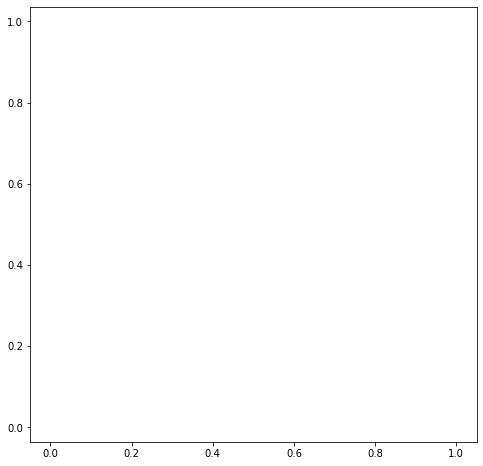

In [31]:
plt.subplots(figsize =(8,8))
plt.axis('equal');
plt.scatter(lda_df_isomap[0],lda_df_isomap[1], c=dbpedia_df['Product Model'], cmap = plt.cm.Spectral)


In [ ]:
plt.subplots(figsize =(8,8))
plt.axis('equal');
plt.scatter(lda_df_isomap[0],lda_df_isomap[1], c=dbpedia_df['Most_Likely_Topic'], cmap = plt.cm.Spectral)

## TSNE

In [40]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components =2,init= 'pca', random_state=0)

### Using pyLDAvis

In [38]:
!pip install pyLDAvis
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()

     |████████████████████████████████| 1.6MB 10.7MB/s eta 0:00:01
     |████████████████████████████████| 296kB 30.5MB/s eta 0:00:01
     |████████████████████████████████| 163kB 37.5MB/s eta 0:00:01
     |████████████████████████████████| 235kB 37.1MB/s eta 0:00:01
     |████████████████████████████████| 829kB 36.1MB/s eta 0:00:01
     |████████████████████████████████| 552kB 30.5MB/s eta 0:00:01
     |████████████████████████████████| 92kB 20.6MB/s eta 0:00:01
  Stored in directory: /home/jupyterlab/.cache/pip/wheels/98/71/24/513a99e58bb6b8465bae4d2d5e9dba8f0bef8179e3051ac414
  Stored in directory: /home/jupyterlab/.cache/pip/wheels/8b/99/a0/81daf51dcd359a9377b110a8a886b3895921802d2fc1b2397e
  Stored in directory: /home/jupyterlab/.cache/pip/wheels/20/5a/d8/1d875df03deae6f178dfdf70238cca33f948ef8a6f5209f2eb
Successfully built pyLDAvis future funcy


In [42]:
panel = pyLDAvis.sklearn.prepare(lda_model, transformed_vector, count_vectorizer, mds='tsne')
panel

TerminatedWorkerError: A worker process managed by the executor was unexpectedly terminated. This could be caused by a segmentation fault while calling the function or by an excessive memory usage causing the Operating System to kill the worker. The exit codes of the workers are {SIGKILL(-9)}